# HW Tool

## 1. `shap.plots.beeswarm` нормального человека (6 баллов)

Как вы могли видеть, у встроенного beeswarm plot`а есть несколько недостатков:
- нет информации о том, какие именно значения категориальных признаков в какую сторону толкают предсказания модели
- иногда серые точки (пропущенные значения) прячутся за точками другого цвета -> их не видно (см. rooms_num на графике с семинара)
- иногда раскраска бывает некорректной (потому что она раскрашивает по абсолютным значениям)

Вам предлагается реализовать свою версию shap.plots.beeswarm, которая исправляет эти недостатки.


Итак, требуется написать функцию, которая принимает на вход shap_values и все необходимое и строит по этим данным beeswarm plot
    без вышеперечисленных недостатков, а именно:
- теперь все уникальные значения кат. фич становятся как бы отдельными фичами, по ним видны shap_values (см. пример)
    - чтобы не захламлять ваш график редковстречающимися категориями, принимайте на вход параметр, чтобы контролировать это
    - такие фичи должны быть покрашены в особый цвет, чтобы отличаться от числовых
- точки, отвечающие за наны, должны быть хорошо видны на фоне остальных и не перекрывать их
- раскраска должна адекватно красить ваши точки
    - можно выкидывать выбросы перед покраской
    - можно логарифмировать значения
    - можно красить по квантилям, а не по абсолютным значениям
    - лучше всего красятся равномерное и нормальное распределение

**Обязательно:**
- docstring
- комменты к непонятным кускам кода - что там происходит
- принимайте на вход кол-во фич, которые вы отображаете на графике
- принимайте на вход размер фигуры
- нарисуйте вертикальную линию, обозначающую 0
- сортируйте признаки по среднему модулю shap_values
- используйте stripplot (или аналоги) с jitter`ом, а не swarmplot
- принимайте на вход кол-во точек которое будете отрисовывать (500-3000 = норм)
    - если для какого-то значения кат фичи точек меньше, чем вы задали, рисуйте сколько есть

**!**
Если на вход подана слишком большая выборка, вы можете под капотом сэмплить из нее какое-то адекватное кол-во точек и отрисовывать их.
Однако, раскраску и контроль за отрисовкой категорий лучше базировать на всей выборке, поданной на вход.


Ниже приведен пример. Не меняйте код, предшествующий примеру. Вы не обязаны повторять пример точь-в-точь, это ориентир. Не удаляйте пример.

Удачи!

In [2]:
import numpy as np, pandas as pd
import lightgbm as lgb

%load_ext autoreload
%autoreload 2


df = pd.read_parquet('train_sber.parquet')
features = df.columns.drop(['timestamp', 'result_price', 'result_price_bin'])

model = lgb.Booster(model_file='model.lgb')
shap_values = model.predict(df[features], pred_contrib=True)
            
'''
Учтите, что если вы считаете shap_values через LightGBM,
    shap_values - np.array of shape (N, F + 1), где последний столбец - константа = среднее предсказание для всех объектов
'''
print('features shape:', features.shape, 'shap_values shape:', shap_values.shape)
df.head(3)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
features shape: (36,) shap_values shape: (27232, 37)


,district_area,road_distance_1,road_distance_2,year_of_construction,bulvar_ring_km,bus_station_distance,cafe_count,fitness_center_distance,floor,district_population,...,public_transport_station_distance,sadovoe_km,base_school_distance,sport_count,state,district_name,timestamp,malls_count,railway_station_distance,result_price_bin
0,6407578.100,1.422391,3.830951,NaN,13.675657,24.292406,152,0.485841,4.0,86206,...,3.299822,13.100618,0.177975,52,NaN,Bibirevo,2011-08-20,52,14.231961,False
1,9589336.912,2.887377,3.103996,NaN,8.132640,5.706113,177,0.668364,3.0,76284,...,0.783160,6.444333,0.273345,66,NaN,Nagatinskij Zaton,2011-08-23,40,9.242586,False
2,4808269.831,0.647250,2.927487,NaN,8.054252,6.710302,122,0.733101,2.0,101982,...,3.945073,6.963403,0.158072,67,NaN,Tekstil'shhiki,2011-08-27,35,9.540544,False


In [2]:
def my_beeswarm(shap_values, *args, **kwargs):
    pass

In [3]:
# ваш пример
print(shap_values)

[[-6.40841111e-04  2.57300682e-03 -1.30688084e-03 ...  7.99491095e-02
   1.96700940e-02 -3.52715786e-03]
 [ 1.53104916e-04 -9.73998694e-04 -2.45611673e-05 ...  1.13526829e-01
   2.11592136e-03 -3.52715786e-03]
 [-4.79932589e-04  1.81037308e-03  2.08710389e-03 ...  8.20155262e-02
   3.56724077e-02 -3.52715786e-03]
 ...
 [ 3.17796951e-04  3.18055574e-03 -1.51526788e-05 ...  5.51455564e-02
   1.70242350e-03 -3.52715786e-03]
 [ 1.61343343e-03  1.76024311e-03  4.06189637e-03 ...  5.30827554e-02
   2.12586012e-02 -3.52715786e-03]
 [ 2.72876706e-04  5.75457861e-03  7.80005776e-03 ...  1.06663411e-01
   5.47821821e-02 -3.52715786e-03]]


Пример ниже. Не удаляйте пример!

CPU times: total: 1.61 s
Wall time: 1.61 s


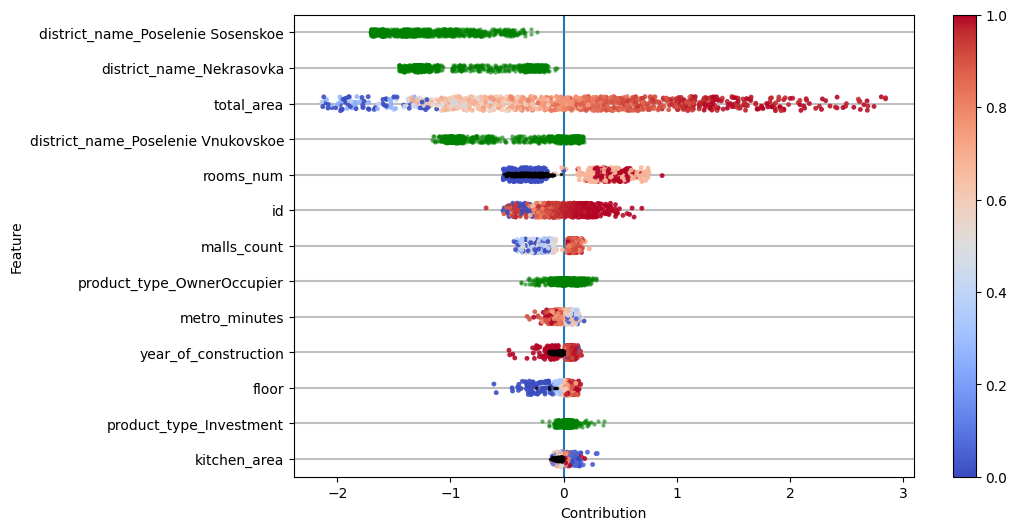

In [28]:
%%time
from utils import shap_beeswarm

shap_beeswarm(model, df, features, cat_feature_threshold=0.001, shap_values=shap_values, top_k=13, figsize=(10, 6), dots=1000)

## 2. Логирование градиентов при обучении (4 балла)

**Задача:** хотим для каждого объекта для каждого дерева получить gi - производную лосса!
Чтобы:
- нарисовать карту объект-дерево
- поизучать 2D-представления
- призадуматься...

**Как:** придумайте способ! Нужно в процессе обучения сохранять градиенты LogLoss`а объектов на каждом дереве, после чего продемонстрировать собранные градиенты с помощью sns.clustermap. 

Ниже пример. Не удаляйте пример!

In [ ]:
# your code here

Пример. Не удаляйте пример!

In [104]:
def get_split(df, val_size=0.33):
    train_idx = np.random.choice(df.index, size=int(df.shape[0]*(1-val_size)), replace=False)
    val_idx = np.setdiff1d(df.index, train_idx)
    return df.loc[train_idx].reset_index(drop=True), df.loc[val_idx].reset_index(drop=True)

tr, val = get_split(df, val_size=0.23)
lgb_tr = lgb.Dataset(tr[features], tr.result_price_bin)

grads = somehow_get_grads()
grads.shape

(100, 20968)

CPU times: total: 1min 17s
Wall time: 1min 17s


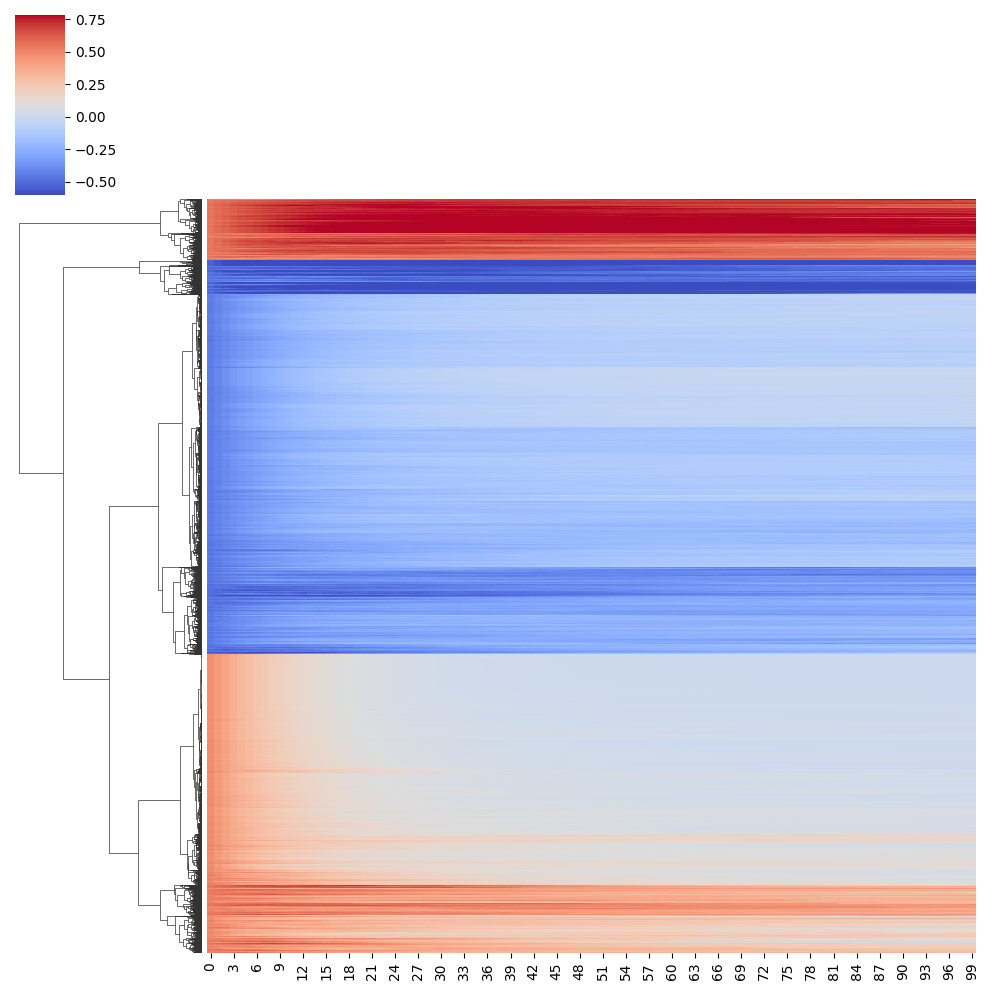

In [102]:
%%time
import seaborn as sns

# предварительно установите fastcluster: pip install fastcluster, иначе считаться будет долго
sns.clustermap(grads.T, col_cluster=False, robust=True, yticklabels=False, cmap='coolwarm')

## 3. Автоматическое создание весов для бинарной классификации (5 баллов)

В этом блоке ваша цель - написать функцию, которая генерирует вектор весов для объектов обучающей выборки следующим образом:
1) на вход подается таргет-колонка и произвольная колонка
2) если колонка числовая, бьем ее на бины (кол-во бинов `bins` принимаем на вход. берем небольшое, около 7-13)
    - если в колонке < `bins` уникальных, бить не надо 
3) если колонка категориальная, тоже бьем ее на бины
    - если уникальных значений <= `bins`, то за бины считаем уникальные значения категории
    - если уникальных значений >  `bins`, то выбираем `bins` - 1 самых популярных категорий у объектов класса 1
    - не попавшие в топ самых популярных категории запихиваем в бин 'other'

4) проходимся по всем бинам, присваивая всем объектам класса 1, попавшим в бин, вес n_0_in_bin / n_1_in_bin,
       если объектов класса 0, попавших в этот бин, достаточное кол-во (принимайте на вход, зависит от задачи)

5) всем объектам класса 0 присваиваем вес, равный единице

Такая схема на практике работает лучше, чем обычный `scale_pos_weight` параметр в LightGBM и его аналоги, если разумно выбирать
    вспомогательную колонку. Подумайте, как именно нужно выбирать такую колонку. Ответ писать не обязательно, но можно :)

**Обязательно:**
Найдите способ продемонстрировать визуализацией, что ваша функция работает корректно!